In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from scipy import sparse
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
import joblib
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Abdel
[nltk_data]     Alim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stop_words = set(stopwords.words('english'))
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])
def remove_multiple_spaces(x):
    return " ".join([word for word in str(x).split()])
def preprocessing(data):
    data = data.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)
    data['CONTENT'] = data['CONTENT'].str.lower()
    data['CONTENT'] = data['CONTENT'].str.replace(r'.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),])+',' ')
    data['CONTENT'] = data['CONTENT'].str.replace(r'[^\w\s]',' ')
    data['CONTENT'] = data['CONTENT'].apply(lambda x : remove_multiple_spaces(x))
    data['CONTENT'] = data['CONTENT'].apply(lambda x : remove_stop(x))
    data = data.drop_duplicates(subset='CONTENT', keep='first')
    x = data['CONTENT']
    y = data['CLASS']
    return(x,y)




C:\Users\Abdel Alim\AppData\Local\Temp\ipykernel_17892\3808629581.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data['CONTENT'] = data['CONTENT'].str.replace(r'.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),])+',' ')
C:\Users\Abdel Alim\AppData\Local\Temp\ipykernel_17892\3808629581.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['CONTENT'] = data['CONTENT'].str.replace(r'[^\w\s]',' ')


1 1.0
2 0.8953982300884954
3 0.9517699115044248
4 0.9017699115044246
5 0.9308849557522123
6 0.8819469026548673
7 0.9067699115044247
8 0.8692477876106196
9 0.8880973451327434
10 0.8552654867256635
11 0.8852212389380533
12 0.8416814159292035
13 0.8638053097345133
14 0.8253097345132743
15 0.8524336283185842
16 0.82429203539823
17 0.8410176991150443
18 0.798938053097345
19 0.825
20 0.7928761061946902
21 0.8077876106194691
22 0.7807079646017699
23 0.7861504424778762
24 0.7506194690265486
25 0.7741150442477877
26 0.7409734513274335
27 0.7646902654867257
28 0.7182743362831858
29 0.7411061946902653
30 0.7102212389380531
31 0.7264601769911504
32 0.6926548672566372
33 0.7143362831858407
34 0.6871238938053098
35 0.6987610619469027
36 0.6608407079646018
37 0.6815044247787612
38 0.6544690265486726
39 0.6705309734513274
40 0.6349999999999999
41 0.6588495575221239
42 0.6299115044247787
43 0.634424778761062
44 0.6180530973451328
45 0.6400884955752213
46 0.610929203539823
47 0.6199557522123894
48 0.605

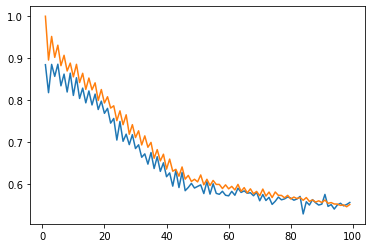

In [18]:
data = pd.read_csv('theDataset/Youtube01-Psy.csv')
x, y = preprocessing(data)

vectorizer = CountVectorizer( )
featuers = vectorizer.fit_transform(x)



iter =100
X_main, X_test,y_main, y_test = train_test_split(featuers,y ,
                                   test_size = 0.2, 
                                   shuffle = True)
accuracy_mean_train = []
accuracy_mean_valid = []
X_train, X_validat, y_train, y_validat = train_test_split(X_main,y_main ,
                            test_size = 0.16,
                            shuffle = True)
for k in range(1, 100):
    accuracyKTrain= []
    accuracyKValid= []
    
    modle = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    for i in range(iter):
        X_train, X_validat, y_train, y_validat = train_test_split(X_main,y_main ,
                                test_size = 0.16,
                                shuffle = True)
        modle.fit(X_train, y_train)
        accuracyTrain = modle.score(X_train,y_train)
        
        accuracyValid = modle.score(X_validat,y_validat)
        accuracyKTrain.append(accuracyTrain)
        accuracyKValid.append(accuracyValid)
        
    e = np.array(accuracyKTrain)
    f = np.array(accuracyKValid)
        
    print(k, e.mean())
    accuracy_mean_train.append(e.mean())
    accuracy_mean_valid.append(f.mean())
    
m = np.array(accuracy_mean_valid)
bestK = np.where(m == m.max())
n = np.array(accuracy_mean_train)

print(bestK[0] + 1)
plt.plot(range(1,100),m)
plt.plot(range(1,100),n)



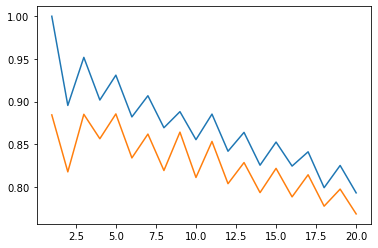

In [23]:
plt.plot(np.linspace(1, 20, 20),n[:20])
plt.plot(np.linspace(1, 20, 20),m[:20])

In [25]:
modle = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
modle.fit(X_train, y_train)
modle.score(X_test,y_test)


0.8970588235294118

1\. Import Data

In [2]:
data = pd.read_csv('theDataset/Youtube03-LMFAO.csv')

data = data.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)
# CONTENT / CLASS
data.isnull().head().sum()


CONTENT    0
CLASS      0
dtype: int64

2. PreProceessing

In [129]:
data["CONTENT"].value_counts()


Check out this video on YouTube:﻿                   74
Check out this playlist on YouTube:﻿                15
Love this song makes me wanna dance! ﻿               3
Check out this playlist on YouTube:<br /><br />﻿     2
everyday I&#39;m shufflin﻿                           2
                                                    ..
this song is fu cking awesom!!!!!!!﻿                 1
never gets old﻿                                      1
Party time!﻿                                         1
Damn, this was everywhere﻿                           1
NICE :3﻿                                             1
Name: CONTENT, Length: 340, dtype: int64

In [198]:
y.info(
)

<class 'pandas.core.series.Series'>
Int64Index: 333 entries, 0 to 437
Series name: CLASS
Non-Null Count  Dtype
--------------  -----
333 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [130]:
data['CONTENT'] = data['CONTENT'].str.lower()

In [131]:
data['CONTENT'] = data['CONTENT'].str.replace(r'.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),])+',' ')


C:\Users\Abdel Alim\AppData\Local\Temp\ipykernel_7592\3125199810.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['CONTENT'] = data['CONTENT'].str.replace(r'.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),])+',' ')


2. Stop Words 

In [132]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Abdel
[nltk_data]     Alim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [133]:
stop_words = set(stopwords.words('english'))

In [135]:
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])
data['CONTENT'] = data['CONTENT'].apply(lambda x : remove_stop(x))

In [81]:
data['CONTENT'] = data['CONTENT'].str.replace(r'[^\w\s]',' ')

C:\Users\Abdel Alim\AppData\Local\Temp\ipykernel_7592\1734438751.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  x['CONTENT'] = x['CONTENT'].str.replace(r'[^\w\s]',' ')


In [82]:
def remove_multiple_spaces(x):
    return " ".join([word for word in str(x).split()])
data['CONTENT'] = data['CONTENT'].apply(lambda x : remove_multiple_spaces(x))

In [144]:
data = data.drop_duplicates(subset='CONTENT', keep='first')

In [3]:
x = data['CONTENT']
y = data['CLASS']


In [4]:
# convert sting to numbers 
vectorizer = CountVectorizer( )
featuers = vectorizer.fit_transform(x)
print(featuers)

  (0, 410)	1
  (0, 411)	1
  (0, 937)	1
  (0, 952)	1
  (0, 185)	1
  (0, 898)	1
  (0, 465)	1
  (0, 80)	1
  (0, 29)	1
  (0, 12)	1
  (0, 129)	1
  (0, 612)	1
  (1, 920)	1
  (1, 152)	1
  (1, 331)	1
  (2, 410)	1
  (2, 185)	1
  (2, 152)	1
  (2, 393)	1
  (2, 368)	1
  (2, 31)	2
  (2, 413)	2
  (2, 144)	9
  (2, 242)	1
  (2, 892)	2
  :	:
  (435, 95)	1
  (435, 847)	1
  (435, 291)	1
  (435, 120)	1
  (435, 568)	1
  (435, 824)	1
  (435, 673)	1
  (435, 395)	1
  (435, 343)	1
  (435, 520)	1
  (435, 632)	1
  (435, 902)	1
  (435, 844)	1
  (435, 238)	1
  (435, 579)	1
  (436, 816)	1
  (436, 314)	1
  (436, 836)	1
  (436, 865)	1
  (436, 516)	1
  (436, 409)	1
  (436, 219)	1
  (436, 505)	1
  (436, 705)	1
  (437, 570)	1


In [5]:
modle = KNeighborsClassifier(n_neighbors=3)
X_main, X_test,y_main, y_test = train_test_split(featuers,y ,
                                   test_size = 0.2, 
                                   shuffle = True)
X_train, X_validat, y_train, y_validat = train_test_split(X_main,y_main ,
                                   test_size = 0.16,
                                   shuffle = True)


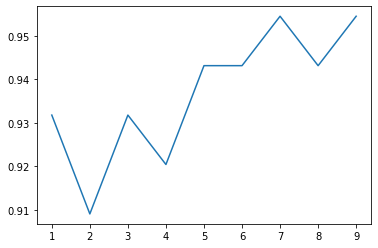

In [6]:
a = []
b =  range(1,10)
for i in b:
    modle = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    modle.fit(X_train, y_train)
    y_predict = modle.predict(X_test)
    
    a.append(accuracy_score(y_predict, y_test)) 
plt.plot(b, a)

In [7]:
y_predict

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [174]:
a = []
modle = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
iter =10000
maxacurssy = 0.89
bestX_train, bestX_test,besty_train,besty_test = X_train, X_validat,y_train, y_validat

for i in range(iter):
    X_train, X_validat, y_train, y_validat = train_test_split(X_main,y_main ,
                                   test_size = 0.16,
                                   shuffle = True)
    modle.fit(X_train, y_train)
    accuracy = modle.score(X_validat,y_validat)
    a.append(accuracy)
    if maxacurssy < accuracy:
        joblib.dump(modle,'nahini.joblib')
        maxacurssy = accuracy
        print(maxacurssy)
        bestX_train, bestX_test,besty_train,besty_test = X_train, X_validat,y_train, y_validat

0.9069767441860465
0.9302325581395349
0.9534883720930233
0.9767441860465116
1.0


In [161]:
modle.fit(bestX_train, besty_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [162]:
y_predict = modle.predict(X_test)
print(accuracy_score(y_predict, y_test))

0.9166666666666666


In [191]:
a = []
modle = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
iter =10000
maxacurssy = 0.89
bestX_train, bestX_test,besty_train,besty_test = X_train, X_test,y_train, y_test 
for i in range(iter):
    X_train, X_test,y_train, y_test = train_test_split(featuers,y ,
                                   test_size=0.25,
                                   shuffle=True)
    modle.fit(X_train, y_train)
    accuracy = modle.score(X_test,y_test)
    a.append(accuracy)
    if maxacurssy <accuracy:
        joblib.dump(modle,'nahini.joblib')
        maxacurssy = accuracy
        print(maxacurssy)
        bestX_train, bestX_test, besty_train, besty_test = X_train, X_test, y_train, y_test

0.9047619047619048
0.9166666666666666
0.9285714285714286
0.9523809523809523
0.9642857142857143
0.9761904761904762


In [194]:
ap = np.array(a)
print(ap.mean())

0.8691416666666666


In [196]:
y_predict = modle.predict(X_test)

print(accuracy_score(y_predict, y_test))

0.8690476190476191


In [19]:
def predictWithKnn(x, model, vectorizer):
    
    featuerspre = vectorizer.transform([str(x)])
    y_pred = modle.predict(x)
    return y_pred